Following dataset has been used: 
https://archive.ics.uci.edu/ml/datasets/Online+Retail 

The dataset contains transaction data of an online retailer based in UK for a year. <br>
It is made publicly available by School of Engineering, London South Bank University. 
It has **541,909 records**. It has the following attributes: <br>
1) **InvoiceNo** : 6 digit transaction ID <br>
2) **StockCode**: Product ID <br>
3) **Description**: Product Description <br>
4) **Quantity**: Number of counts of the product purchased <br>
5) **InvoiceDate**: Date and time of transaction<br> 
6) **UnitPrice** Price of 1 item
7) **CustumerID**: Unique ID for a customer <br>
8) **Country**: Country where the customer resides <br> 

**Goal**: <br>
1) Identify top selling items <br>
2) Itdentify frequently bought items in transactions for: <br>
&emsp; a) Promotional Combo Offers  <br>
&emsp; b) Item Suggestions for the customer based on purchase of some other items<br>
&emsp; c) Online Product Placements: to suggest frequently bought together items closeby <br>
3) Draw insights from customer purchase patterns <br> 

**Exploratory Data Analysis** <br>
1) Cleaning data <br>
2) Visualize data  <br>
**Frequent Itemsets** mining using following algorithms: <br>
1) Apriori <br>
2) FP-Growth <br>

Apriori and FP-Growth algorithms are ideal for finding frequent item sets in a set of transaction. Both algorithms are more efficient than *Brute force counting* of frequent itemsets in terms of time complexity. <br>
Both Apriori and FP-Growth candidate generation is optimal.

<span style="color:red">**Question 6:** </span> What limitations does your 'selected' method(s) has(have) that may limit your ability to accomplish the goal you have set for yourself? 


Limitations: <br>
1) Data not clean for direct libary use <br>
2) Huge number of records (~500K), it may take a long time for Apriori algorithm. FP-Growth should perform better as it will not reference the original database more than once. <br>

<span style="color:red">**Question 7:** </span> Do you have any alternative plan/strategy to overcome the above limitation(s)?

Strategy: <br>
1) Clean data and transform for the libary usage <br>
2) Filter data if the dataset takes huge time and do analysis at a more granular level <br>
3) Compare perfromance of the algorithm on smaller dataset and use the one which is faster on the whole database <br>

<span style="color:red">**Question 8:** </span> For each of the methods you want to use, what parameter choices do you want to use and why? It does not have to be one parameter choice, it could be a collection or a range of choices you may want to consider.

Parameters for the following: <br>
a) min_support = [0.1, 0.05,0.02,0.01] <br>
b) length = 1 for finding frequent items and >=2 for finding item sets for tasks of more than 2 items (promotional offers, item suggestions and online product placement) <br>



<span style="color:red">**Question 9:** </span> How will you evaluate that you are successful in your pursuing your goal at the end of the project? In other words, what is your evaluation criteria?


**Success criteria:** <br>
1) Able to draw insights from exploratory data analysis <br>
2) Speed of generation of frequent itemsets is fast enough <br>
3) Able to generate item sets of more than 1 item with sufficient cofidence (at least 1%) <br>
4) Able to draw conclusions from the frequent itemsets relevent to the tasks mentioned above 

<span style="color:red">**Question 10:** </span> How will you evaluate that you are successful in your pursuing your goal at the end of the project? In other words, what is your evaluation criteria?


**Success criteria:** <br>
1) Able to draw insights from exploratory data analysis <br>
2) Speed of generation of frequent itemsets is fast enough <br>
3) Able to generate item sets of more than 1 item with sufficient cofidence (at least 1%) <br>
4) Able to draw conclusions from the frequent itemsets relevent to the tasks mentioned above 

<span style="color:red">**Question 11:** </span> Show any visualizations you may have generated to understand your data. Please include the code you used and the plots below. If you borrowed code (entirely or partially) from the hands-on projects or anywhere else, clearly provide a link to your source.

You may use this package to load UCI data in python: https://github.com/SkafteNicki/py_uci

**Source code** for apriori and fpgrowth (mlxtend.frequent_patterns user guide): http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#association-rules-generation-from-frequent-itemsets 

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder


In [2]:
#importing data and priting first few transactions
online_retail  = pd.read_excel("Online Retail.xlsx")
print(online_retail.shape)
online_retail.head()


(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Cleaning data

In [6]:
retail_df = online_retail.copy()
#deleting junk records
retail_df["Description"] = retail_df["Description"].astype(str)
retail_df["StockCode"] = retail_df["StockCode"].astype(str)
retail_df = retail_df[retail_df["StockCode"].str.contains('[0-9]')]
retail_df= retail_df[retail_df['UnitPrice']!=0]
retail_df= retail_df[retail_df['Quantity']>0]
#deleting cancelled records
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str)
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]
#checking for null values in columns
print("Total null values in every column")
print(retail_df.isna().sum())

Total null values in every column
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131436
Country             0
dtype: int64


In [7]:
retail_df.nunique()

InvoiceNo      19776
StockCode       3911
Description     4016
Quantity         374
InvoiceDate    18335
UnitPrice        502
CustomerID      4334
Country           38
dtype: int64

We observe the StockCode (Product ID) to Description mapping is not one to one

# Visualizing Data

In [59]:
np.sort(retail_df.groupby("Country")["InvoiceNo"].nunique())

array([    1,     1,     1,     1,     2,     2,     3,     3,     4,
           4,     5,     5,     5,     5,     7,     7,     8,    13,
          14,    17,    18,    19,    19,    25,    32,    34,    35,
          40,    50,    50,    56,    88,    93,    98,   284,   383,
         443, 17901], dtype=int64)

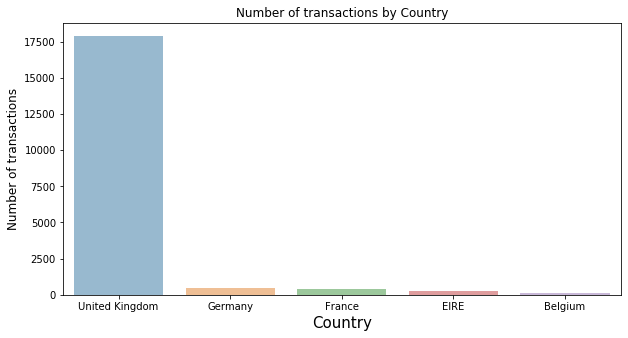

In [60]:
trans_by_country = retail_df.groupby("Country")["InvoiceNo"].nunique()
trans_by_country = trans_by_country.nlargest(5)
plt.figure(figsize=(10,5))
plt.title('Number of transactions by Country', fontsize = 12)
plt.ylabel('Number of transactions', fontsize=12)
plt.xlabel('Country', fontsize=15)
sns.barplot(trans_by_country.index, trans_by_country.values, alpha = 0.5 )

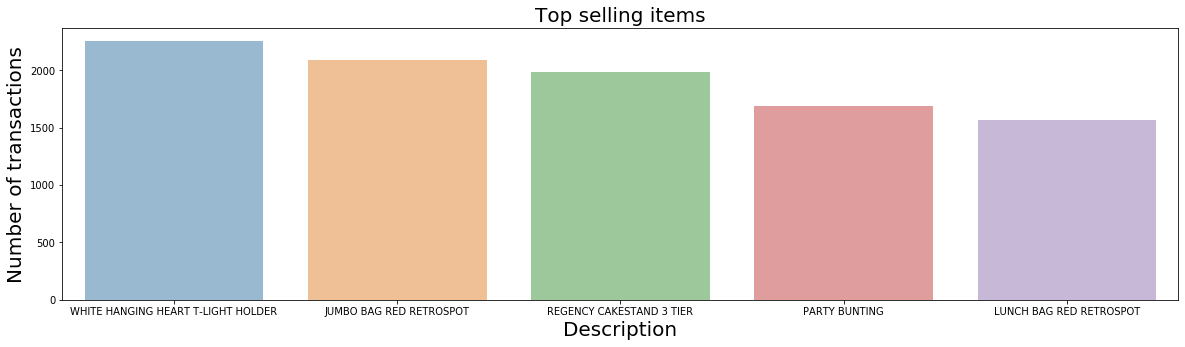

In [61]:
trans_by_product = retail_df.groupby("Description")["InvoiceNo"].nunique()
trans_by_product = trans_by_product.nlargest(5)
#trans_by_country[trans_by_country > 100].plot(kind="bar")
plt.figure(figsize=(20,5))
plt.title('Top selling items', fontsize = 20)
plt.ylabel('Number of transactions', fontsize=20)
plt.xlabel('Item Description', fontsize=20)
sns.barplot(trans_by_product.index, trans_by_product.values, alpha = 0.5 )
plt.show()

<span style="color:red">**Question 12:** </span> **Perform data mining, evaluate your work and report your findings.** This should include code, plots and results you may have generated. If you borrowed code (entirely or partially) from the hands-on projects or anywhere else, clearly provide a link to your source.

In [131]:
#Changing format of the dataset to pass to the library Apriori and FPGrowth function
trans_df = retail_df.groupby('InvoiceNo')['Description'].apply(list)
trans_list = trans_df.to_list()

In [132]:
te = TransactionEncoder()
te_ary = te.fit(trans_list).transform(trans_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [143]:
min_support = [0.1,0.05,0.02,0.01]
time_fp =  {0.1:0,0.05:0, 0.02:0, 0.01:0}
freq_is = {0.1:0,0.05:0, 0.02:0, 0.01:0}
freq_is1 = {0.1:0,0.05:0, 0.02:0, 0.01:0}
freq_is2 = {0.1:0,0.05:0, 0.02:0, 0.01:0}
time_ap =  {0.1:0,0.05:0, 0.02:0, 0.01:0}

In [144]:
import datetime 
for i in min_support:
    start = datetime.datetime.now()
    frequent_itemsets = fpgrowth(df, min_support=i, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    end = datetime.datetime.now()
    elapsed = end - start
    print("min support = "+str(i))
    freq_is[i] = len(frequent_itemsets)
    freq_is1[i] = sum(frequent_itemsets["length"]==1)
    freq_is2[i] = sum(frequent_itemsets["length"]>1)
    print("total frequent itemsets of size 1 = "+str(freq_is1[i]))
    print("total frequent itemsets of size more than 1 = "+str(freq_is2[i]))
    time_fp[i] = elapsed.seconds + (elapsed.microseconds / 1000000)
    print(elapsed.seconds,"secs ",elapsed.microseconds,"microsecs")

min support = 0.1
total frequent itemsets of size 1 = 3
total frequent itemsets of size more than 1 = 0
1 secs  654657 microsecs
min support = 0.05
total frequent itemsets of size 1 = 33
total frequent itemsets of size more than 1 = 0
1 secs  781243 microsecs
min support = 0.02
total frequent itemsets of size 1 = 299
total frequent itemsets of size more than 1 = 82
5 secs  917762 microsecs
min support = 0.01
total frequent itemsets of size 1 = 823
total frequent itemsets of size more than 1 = 1051
13 secs  562868 microsecs


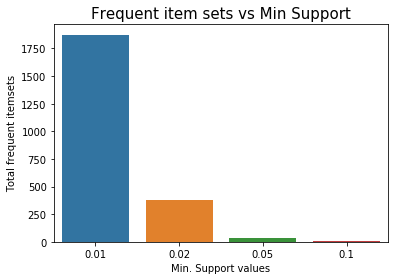

In [145]:
plt.title('Frequent item sets vs Min Support', fontsize = 15)
plt.ylabel('Total frequent itemsets', fontsize=10)
plt.xlabel('Min. Support values', fontsize=10)
sns.barplot(list(freq_is.keys()), list(freq_is.values()))

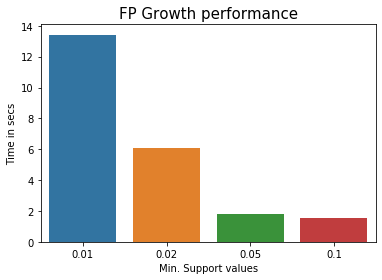

In [129]:
plt.title('FP Growth performance', fontsize = 15)
plt.ylabel('Time in secs', fontsize=10)
plt.xlabel('Min. Support values', fontsize=10)
sns.barplot(list(time_fp.keys()), list(time_fp.values()))

We observe parameter min_support 0.02 or 2% of the total transactions is ideal for our tasks <br>
Comparing the performance w.r.t. Apriori 

In [128]:
for i in min_support:
    start = datetime.datetime.now()
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    end = datetime.datetime.now()
    elapsed = end - start
    time_ap[i] = elapsed.seconds + (elapsed.microseconds / 1000000)

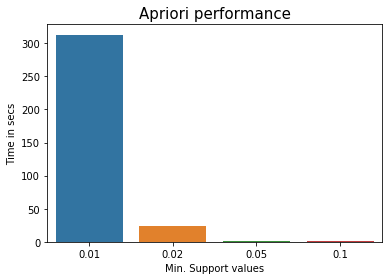

In [130]:
plt.title('Apriori performance', fontsize = 15)
plt.ylabel('Time in secs', fontsize=10)
plt.xlabel('Min. Support values', fontsize=10)
sns.barplot(list(time_ap.keys()), list(time_ap.values()))

In [151]:
#Selecting frequent item sets of size >=2
frequent_itemsets2 = frequent_itemsets[frequent_itemsets["length"]>=2].sort_values(by=['support'], ascending=False)

In [208]:
Top10_s = list(frequent_itemsets2["support"][0:10]*100)
Top10_is = list(frequent_itemsets2["itemsets"][0:10])
X = [list(x) for x in Top10_is]
Top10_is = [str(x)[2:-2] for x in X]

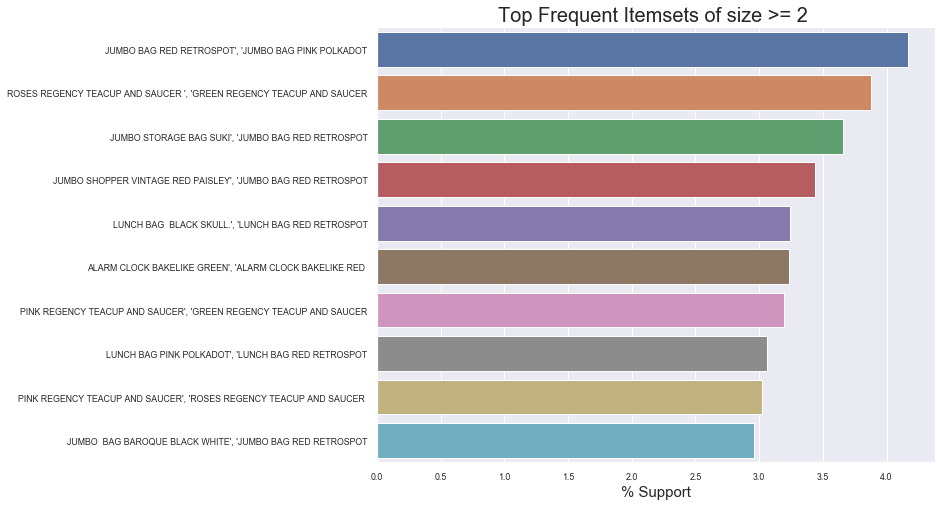

In [209]:
plt.figure(figsize=(10,8))
plt.title('Top Frequent Itemsets of size >= 2 ', fontsize = 20)
plt.xlabel('% Support', fontsize=15)
sns.set(font_scale=0.8)
sns.barplot(Top10_s,Top10_is)

We see custumers frequently buy the above items together: <br>
***Following insights can be drawn from this analysis*** <br>
1) **"Jumbo Bag Red Retrospot"** is one of the highest selling item (from high selling item chart) and also forms frequent itemsets with others. Such items can be sold on discount to drive sales of other items bought frequently with it like : "Jumbo Storage Bad Suki" , "Jumbo Shopper Vintage Red Paisley" <br>
2) Customers buy **same types of items together**: eg: Jumbo bags of 2 types or Alarm clocks of 2 types or 2 types of teacups and saucer <br>
3) On website **these combinations can be put closer to eachother** for customer performance and driving more sales of items which have high affinity with the other <br> 


<span style="color:red">**Question 13:** </span> Putting your findings in the context of your goal and evaluation plan, do you consider yourself successful? Provide reasons for your success or lack thereof.

Yes. <br>
Reasons: <br>
1) We are able to find the frequent itemsets from this huge transaction data with small amount of time. FPGrowth takes around 13 secs. <br> 
2) These itemsets can be used for the tasks defined earlier i.e. <br>
&emsp;a) Identifying top selling items <br>
&emsp;b) Identifying top frequent item sets for promotional offers <br> 
&emsp;c) Online placement of products <br>
&emsp;d) Draw insights of customer purchase patterns : same type of items bought together etc <br>

<span style="color:red">**Question 14:** </span> If you have an extra month to work on this project, what else would you do? Provide reasons.

Further tasks if given time: <br>
1) Clean up data more(we see productID to ProductDescriptions is not 1-1 relation) <br>
2) Compute **association rules** from these datasets: These can be used for pricing items. <br>
3) Maximal and closed items sets for compressed storage of data <br>
4) More plots for conveying more information <br>
5) Deeper **analysis at a more granular level** <br>
6) Usage of custumer data (customerID) for **custumer segmentation using clustering** to find patterns in customers<br>
7) Finding more **customer purchase patterns** from the frequent itemsets<br>

<span style="color:red">**Question 15:** </span> Do you consider this project to be in the 'innovative category' or a 'good application' category? Provide your reason. 


The project is in **innovative category** in terms of application of itemsets mining concepts to solve a business question in retail. The insights drawn from the this application are relevant for implementation in the industry and are of immense business value.